# Bank Customer Churn Prediction
Can we reduce customer churn by predicting which customers are at risk of churning, and predicting what their needs are in order to reduce this risk?

This project seeks to answer this question by conducting predictive analysis on customer bank churn data, obtained from Kaggle. Through the development of robust predictive models, the objective is to pinpoint customers most susceptible to churning and devise effective strategies to mitigate this risk, thereby enhancing customer retention and reducing overall company cost. 

After importing and cleaning the data, we can gain a better understanding of our data through exploratory data analysis, and then begin creating and building our models for the predictive analysis.

In [1]:
# graphing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# reading in csv file to dataframe
df = pd.read_csv("Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Data Preprocessing
In this section, the data will be cleaned in the following steps:
* Delete unnecessary columns: RowNumber (redundant), CustomerID (privacy), Surname (privacy).
* Change gender to binary (1 for male, 0 for female).
* Change Geography and Card Type to dummy variables.
* Rename columns.
* Check for missing values.

In [3]:
# deleting unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# make sure there's no 'other' in gender
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [4]:
# only female or male options allow for binary classification
# change gender to binary (1 for male, 0 for female)
df['Gender'] = df['Gender'].apply(lambda x : 1 if x=='Male' else 0)

In [5]:
# change Geography and Card Type to dummy variables
df = pd.get_dummies(df)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,464,1,0,0,1,0,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,0,1,1,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1,0,0,1,0,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,350,1,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,0,1,0,1,0,0


### Renaming columns
Rename some of the columns to make analysis easier.

In [6]:
df.rename(columns={"Satisfaction Score": "Satisfaction_Score", 
                   "Point Earned" : "Points_Earned", 
                   "Geography_France" : "France",
                  "Geography_Germany": "Germany",
                  "Geography_Spain" : "Spain",
                  "Card Type_DIAMOND" : "Diamond",
                   "Card Type_GOLD" : "Gold",
                   "Card Type_PLATINUM" : "Platinum",
                   "Card Type_SILVER" : "Silver"}, inplace = True)

### Missing values
Let's check our missing values and determine how to deal with them.

In [7]:
df.isnull().sum()

CreditScore           0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction_Score    0
Points_Earned         0
France                0
Germany               0
Spain                 0
Diamond               0
Gold                  0
Platinum              0
Silver                0
dtype: int64

No missing values detected, thus our data cleaning process is completed, and the data is now robust and ready to be explored.




## Exploratory Data Analysis
In this section, we will explore the data graphically to gain a better understanding of the data.

In [8]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Points_Earned,France,Germany,Spain,Diamond,Gold,Platinum,Silver
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,464,1,0,0,1,0,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,0,1,1,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1,0,0,1,0,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,350,1,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,0,1,0,1,0,0


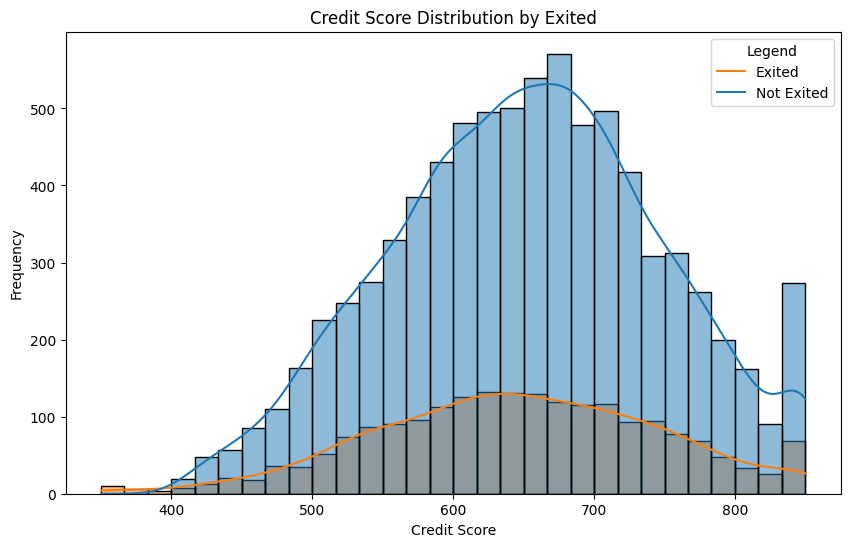

In [9]:
# creditscore histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CreditScore', hue='Exited', bins=30, kde=True)
plt.title('Credit Score Distribution by Exited')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.legend(title='Legend', labels=['Exited', 'Not Exited'])
plt.show()

A normal distribution of credit scores, with the peak closer to 700.

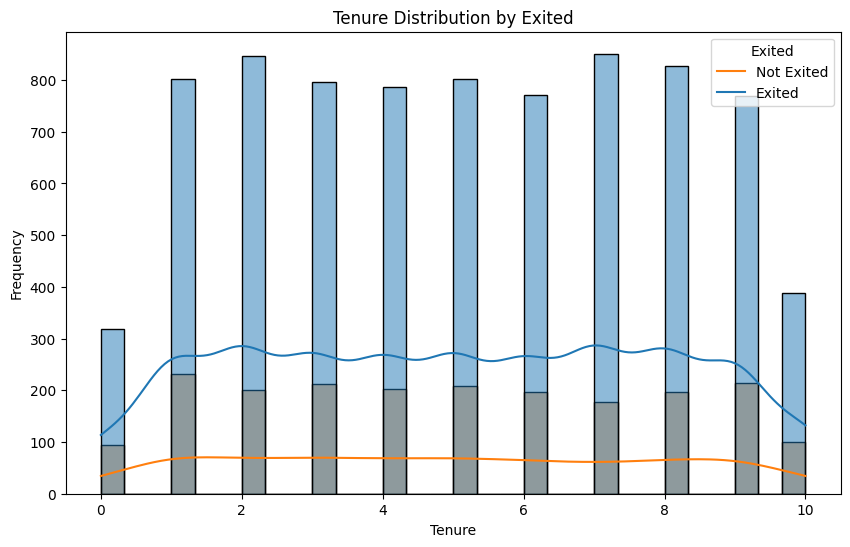

In [10]:
# tenure histogram overlayed by binary exit variable
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tenure', hue='Exited', bins=30, kde=True)
plt.title('Tenure Distribution by Exited')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend(title='Exited', labels=['Not Exited', 'Exited'])
plt.show()

This plot demonstrates that tenure does not seem to be a major factor for a customer to leave -- in fact, the amount of customers leaving seems to be equal throughout all spreads of tenure, only a significant drop happening once they reach 10 years.

Text(0.5, 1.0, 'Distribution of Churned vs Not Churned Customer per Country')

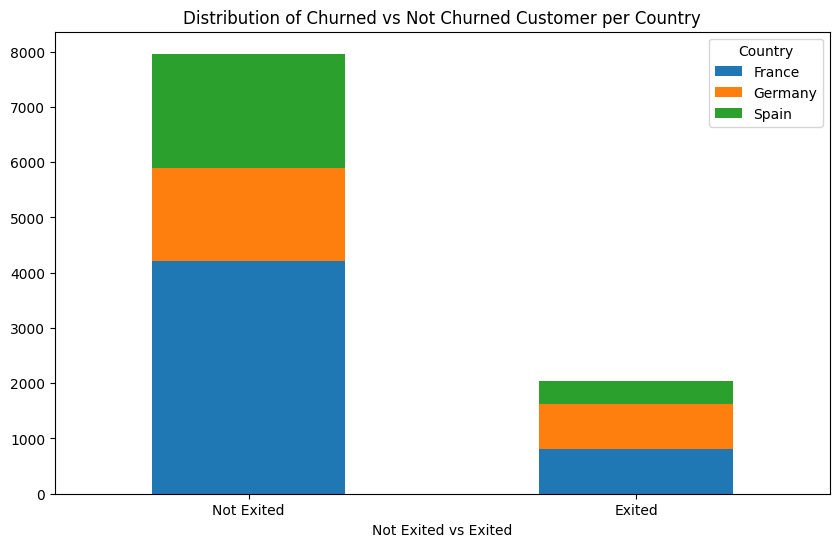

In [11]:
# location distribution

# getting column names we're working with
cols = ['Exited','France', 'Germany', 'Spain']

# get the counts of how many exited or didn't for each country
location_exit_counts = df[cols].groupby('Exited').sum()

# plotting
location_exit_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.legend(title='Country')
plt.xticks([0, 1], ['Not Exited', 'Exited'], rotation=0)
plt.xlabel("Not Exited vs Exited")
plt.title("Distribution of Churned vs Not Churned Customer per Country")


Most of the customers are from France, and we can see the amount of customers churning are proportional to the amount not churning for each country, with the exception of Germany, which seems to be half the size of its original amount. Let's check the churn proportions for each country.

In [12]:
for country in location_exit_counts:
    prop = location_exit_counts[country][1]/location_exit_counts[country][0]
    print(f"{country} churn rate: {prop}")

France churn rate: 0.19295741137282893
Germany churn rate: 0.48023598820059
Spain churn rate: 0.2000968992248062


This confirms that Germany has a 48% churn rate, which will be important to keep in mind.

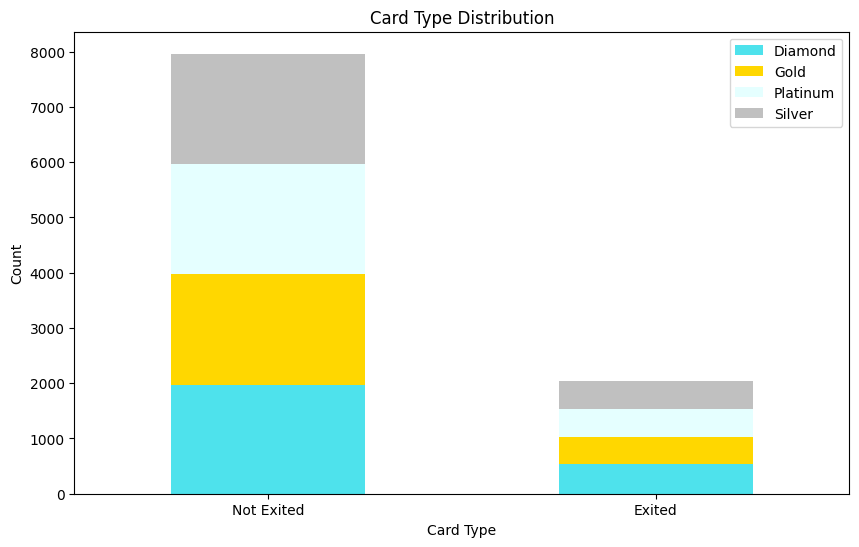

In [13]:
# distribution of card types
colors = ['#4ee2ec', '#ffd700', '#e5ffff','#c0c0c0']
card_counts = df[['Diamond', 'Gold', 'Platinum', 'Silver', 'Exited']].groupby('Exited').sum()
card_counts.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)
plt.title('Card Type Distribution')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Exited', 'Exited'], rotation=0)
plt.show()

The cards are all perfectly distributed for both churned and non-churned customers.

Text(0.5, 1.0, 'Gender and Age Distribution')

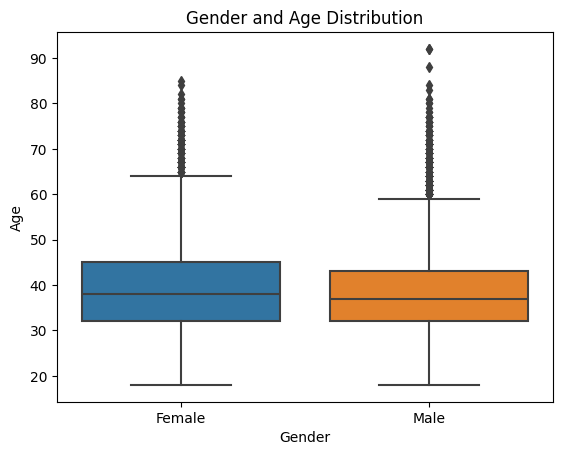

In [22]:
# age boxplot
sns.boxplot(data=df, x='Gender', y='Age')
plt.xticks([0,1], ['Female', 'Male'])
plt.title('Gender and Age Distribution')

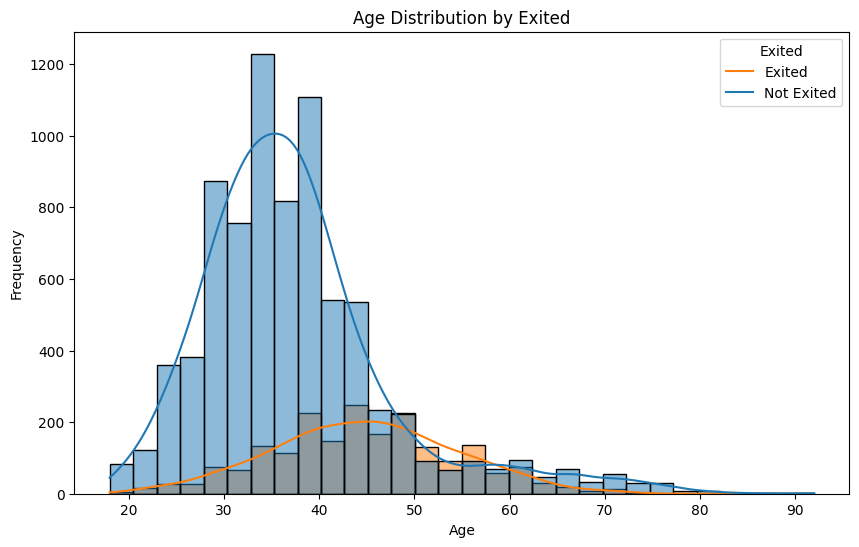

In [15]:
# age histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', bins=30, kde=True)
plt.title('Age Distribution by Exited')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Exited', labels=['Exited', 'Not Exited'])
plt.show()

A widespread of ages, with a peak of around 37 years of age. 

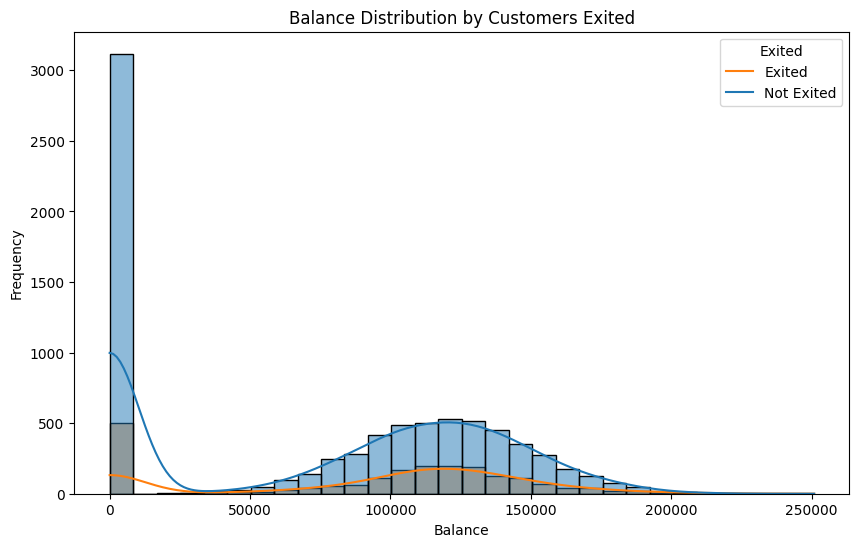

In [16]:
# balance histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Balance', hue='Exited', bins=30, kde=True)
plt.title('Balance Distribution by Customers Exited')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend(title='Exited', labels=['Exited', 'Not Exited'])
plt.show()

There's an abundant amount of customers with no money in their bank account. While they still exit, it seems to otherwise be a normal distribution, where the peak mean balance of about 125,000 is where the most customers churned.

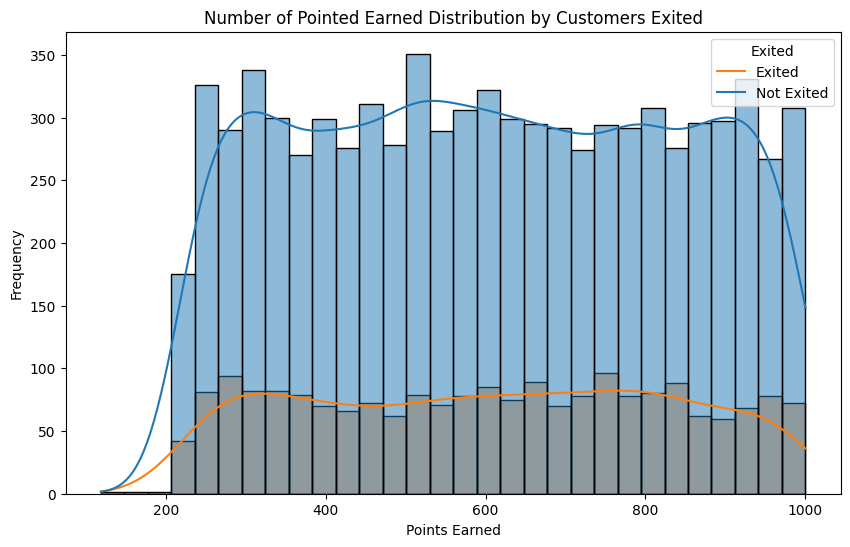

In [17]:
# points earned histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Points_Earned', hue='Exited', bins=30, kde=True)
plt.title('Number of Pointed Earned Distribution by Customers Exited')
plt.xlabel('Points Earned')
plt.ylabel('Frequency')
plt.legend(title='Exited', labels=['Exited', 'Not Exited'])
plt.show()

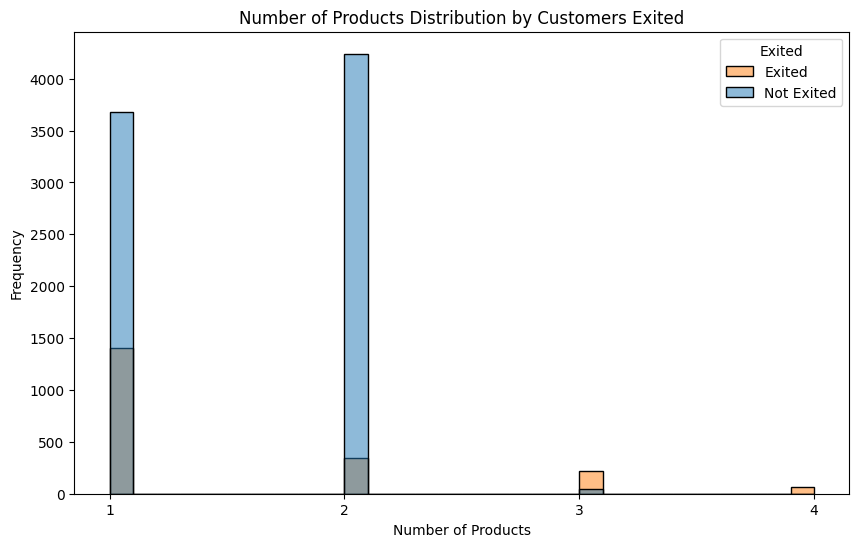

In [18]:
# number of products histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='NumOfProducts', hue='Exited', bins=30)
plt.title('Number of Products Distribution by Customers Exited')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.legend(title='Exited', labels=['Exited', 'Not Exited'])
plt.xticks([1,2,3,4])
plt.show()

It seems 2 is the optimal number of products for a customer to have. If they have more, they're incredibly likely to churn, and if they only have 1, it seems to be half of the customers churn.

In [19]:
# get total of how many complained and exited
complain = df['Complain'].sum()
exited = df['Exited'].sum()

print(f"Customers complained: {complain}")
print(f"Customers exited: {exited}")
print(f"Percentage of customers who exited that complained: {exited/complain}")

Customers complained: 2044
Customers exited: 2038
Percentage of customers who exited that complained: 0.99706457925636


99% of customers who complain end up exiting.

In [20]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Points_Earned,France,Germany,Spain,Diamond,Gold,Platinum,Silver
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100,0.501400,0.250900,0.247700,0.250700,0.25020,0.249500,0.249600
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839,0.500023,0.433553,0.431698,0.433438,0.43315,0.432745,0.432803
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Summary of the statistics
* Mean age: 39
* Mean tenure: 5, ranging from 0-10 years
* Mean balance is 76000 but ranging from 0-250,000
* 70% have credit cards
* 50% are still active members
* 20% have complained, and 20% have exited
* Mean satisfaction score of 3/5
* 50% come from France, and split 50/50 with Germany and Spain

## Modeling
Now that we have explored our data and gained a better understanding, we can begin the modeling process. As this is a binary classification problem, logistic regression is a suitable modeling algorithm for this problem. 

In [21]:
# separate features and target variables
x = df.drop(columns = ['Exited'])
y = df['Exited']

# split the data into training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

# scale and fit the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# initialize model
log_model = LogisticRegression()

# fit the model
log_model.fit(x_train_scaled, y_train)

# make predictions
y_pred = log_model.predict(x_test_scaled)

# evaluate
log_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {log_accuracy}")

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy : 0.9986666666666667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Confusion Matrix:
[[2413    3]
 [   1  583]]


## Conclusion
Through meticulous data preprocessing and data exploration, we optimized the model's performance to an impressive accuracy of 99.87%. Subsequent exploratory data analysis uncovered key insights into factors influencing customer churn, such as their location. We found that the customers based in Germany have a nearly 50% chance of churning, as compared to France’s and Spain’s 20% chance of churning. This finding underscores the significance of regional dynamics and the need for specified retention strategies to address the underlying drivers of churn effectively. We also found that the age group of 45-60 are more likely to churn, and we speculated this may be due to upcoming retirement financial plans not aligning with the bank’s current options, and we propose investigating the complaints of these customers to prepare a financial plan more suited to their needs. Additionally, it was shown that optimally, customers should have about 1-2 products, and having 3 or more leads to a higher likelihood of churning. Overall, the goal of this project was successful in accurately predicting customer churn, which will henceforth enhance customer retention efforts, fortifying customer relationships, and ultimately driving sustained business growth in an increasingly competitive landscape. 
